# Deep Learning Challenge (optional)

![](../../public/titanic_intro.png)

In the early 20th century, the RMS Titanic was the pinnacle of luxury and innovation, a marvel of modern engineering. It was hailed as the "unsinkable" ship, carrying over 2,200 passengers and crew on its maiden voyage across the Atlantic. However, in the icy waters of the North Atlantic, disaster struck, and the unthinkable happened—the Titanic collided with an iceberg and sank, leading to one of the most tragic maritime disasters in history.

Now, over a century later, you are tasked with an important mission: to delve into the historical data and build a predictive model that could have foretold the fate of the passengers aboard the Titanic. This dataset contains detailed records of the passengers, including information such as age, gender, ticket class, family size, and more. **Your goal is to develop a neural network model that accurately predicts whether a passenger would have survived or perished on that fateful night.**

Your predictive model won't just be a technical achievement; it will serve as a lens through which we can better understand the human factors and decisions that played a critical role in survival. As you work through this challenge, you’ll follow the standard deep learning workflow, applying your skills to each stage:

- Data Collection: The data you need has already been gathered from historical records.
- Data Preprocessing: Clean and prepare the data for analysis (partially done for you).
- Exploratory Data Analysis (EDA): Investigate the data and uncover key patterns (partially done for you).
- Feature Engineering: Create or modify features to enhance your model’s performance (paritally done for you).
- Model Architecture Design: Choose an appropriate structure for your neural network model.
- Training: Train your model using the provided dataset.
- Evaluation: Assess your model's accuracy using a validation set and other techniques.
- Hyperparameter Tuning: Fine-tune the model’s parameters to improve performance.
- Model Testing: Test your final model on a separate test set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# sibsp        # number of siblings / spouses aboard the Titanic
# parch        # number of parents / children aboard the Titanic
# ticket       # Ticket number
# fare         # Passenger fare
# cabin        # Cabin number
# embark_town  # Port of Embarkation

#sibsp: The dataset defines family relations in this way:
#Sibling = brother, sister, stepbrother, stepsister
#Spouse = husband, wife (mistresses and fiancés were ignored)

#parch: The dataset defines family relations in this way:
#Parent = mother, father
#Child = daughter, son, stepdaughter, stepson
#Some children travelled only with a nanny, therefore parch=0 for them.

# load titanic dataset (DO NOT MODIFY)
df = sns.load_dataset("titanic")

## Exploratory Data Analysis
Provided below is some starter code to help familiarize yourself with the Titanic dataset. Further data analysis is encouraged but not required.

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


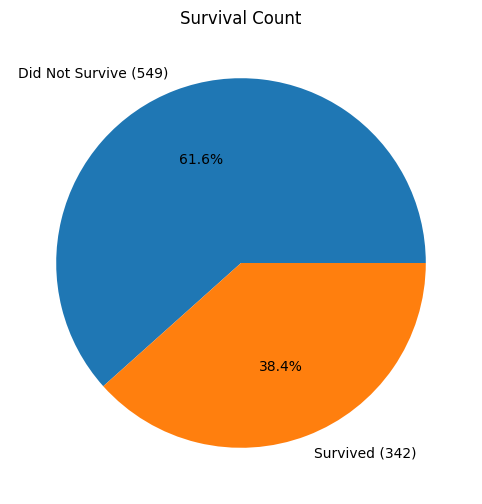

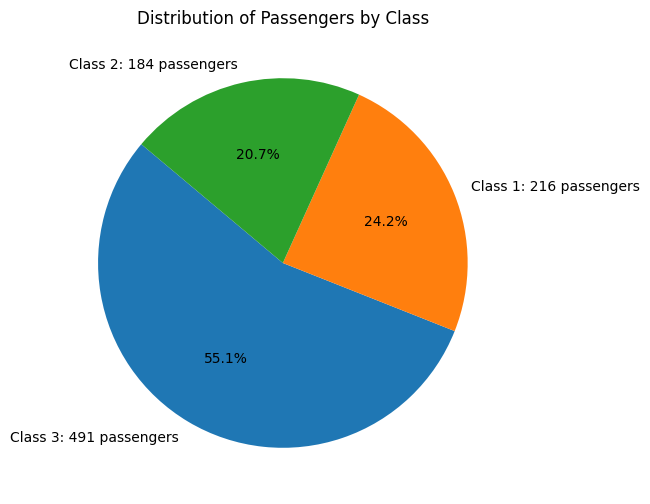

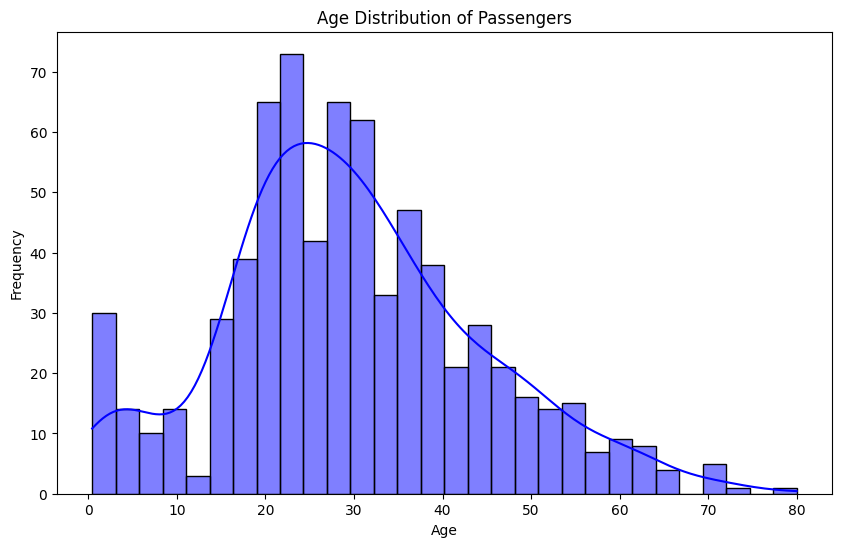

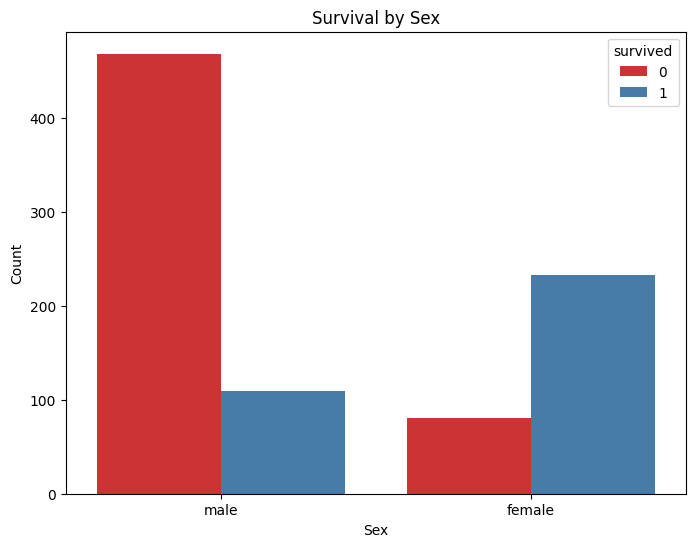

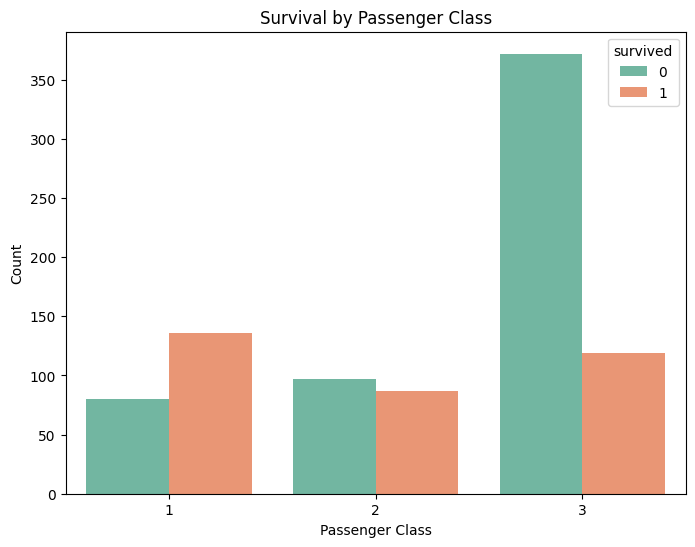

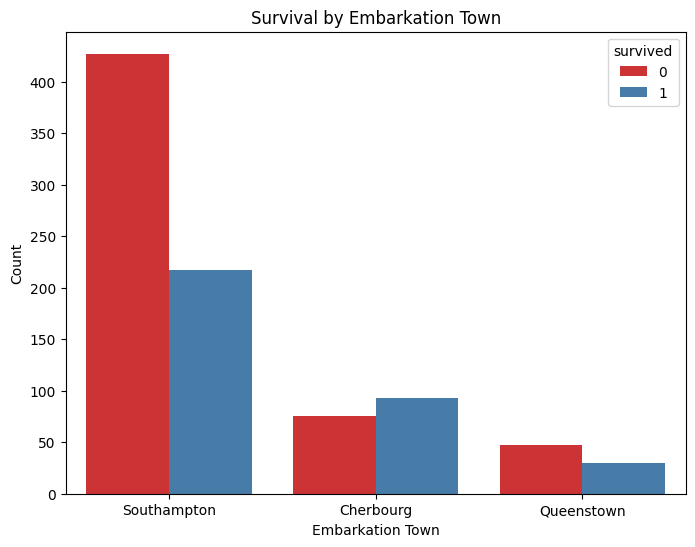

In [ ]:
##############################
# Uncomment code to see output
##############################

df.shape
df.isna().sum()
df.describe()

# Pie Chart for Survived
plt.figure(figsize=(8, 6))
plt.pie(df["survived"].value_counts(), labels=[f"Did Not Survive ({df.shape[0]-df['survived'].sum()})", f"Survived ({df['survived'].sum()})"], autopct='%1.1f%%')
plt.title('Survival Count')
plt.show()

# Pie Chart for Pclass
pclass_counts = df['pclass'].value_counts()
labels = [f'Class {cls}: {count} passengers' for cls, count in zip(pclass_counts.index, pclass_counts.values)]
plt.figure(figsize=(8, 6))
plt.pie(pclass_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Passengers by Class')
plt.show()

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'].dropna(), kde=True, bins=30, color='blue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Survival by Sex
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='survived', data=df, palette='Set1')
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Survival by Passenger Class
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', hue='survived', data=df, palette='Set2')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Survival by Embark Town
plt.figure(figsize=(8, 6))
sns.countplot(x='embark_town', hue='survived', data=df, palette='Set1')
plt.title('Survival by Embarkation Town')
plt.xlabel('Embarkation Town')
plt.ylabel('Count')
plt.show()

## Data Preprocessing and Feature Engineering

In [ ]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [5]:
# drop columns that are redundant or contain many NaN values
df = df.drop(["pclass", "alive", "embarked", "alone", "adult_male", "deck", "age"], axis = 1)
df = df.dropna(subset=["embark_town"])

# TODO: Further data preprocessing (optional)

# fill missing values of 'Fare' with median
df['fare'].fillna(df['fare'].median(), inplace=True)

In [6]:
# One Hot Encode categorical variables
df["sex"] = df["sex"].map({"male": 0, "female": 1})
for label in ["class", "who", "embark_town"]:
    df = df.join(pd.get_dummies(df[label], prefix=label))
    df = df.drop(label, axis=1)

# TODO: Further feature engineering (optional)

# check whether the passager is alone
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['is_alone'] = np.where(df['family_size'] == 1, 1, 0)

---
## Model Development

Check out the sections below marked `TODO` to get started on developing your model. You are free to modify and reformat any of the code provided as you see fit.


We will be using PyTorch for creating our deep learning model.
### PyTorch Resources:
[torch.nn documentation](https://pytorch.org/docs/stable/nn.html)

[torch.nn.Sequential() documentation](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)


---

In [3]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# feel free to add any additional packages as you see fit

In [7]:
### --------------------------------------------
### TODO 1/4: modify train/validation/test split
### --------------------------------------------

train_size = 0.5
validation_size = 0.3
test_size = 0.2

# Note the inclusion of a validation set. This allows
# for unbiased evaluation during model development,
# ensuring the test data remains unseen until final
# assessment. The validation set is used repeatedly
# during the model tuning process, whereas the test
# set provides an independent evaluation once the
# model is finalized.

### --------------------------------------------END TODO 1/4

X = df.drop(columns=['survived'])
y = df['survived']

def to_torch_tensor(X: pd.DataFrame, y: pd.Series) -> torch.Tensor:
    return (torch.tensor(X.to_numpy(dtype=np.float32), dtype=torch.float32),
            torch.tensor(y.to_numpy(dtype=np.float32), dtype=torch.float32).unsqueeze(1))

X, y = to_torch_tensor(X, y)

# Split data into train, validation, and test sets
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=0, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=validation_size/(test_size+validation_size), random_state=0, stratify=y_test)

print(f'Training set size: {len(X_train)}')
print(f'Validation set size: {len(X_val)}')
print(f'Test set size: {len(X_test)}')

# (optional) Standardize the data (using the training mean and std)
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler = StandardScaler()
X_train = torch.tensor(scaler.fit_transform(X_train), dtype=torch.float32)
X_val = torch.tensor(scaler.transform(X_val), dtype=torch.float32)
X_test = torch.tensor(scaler.transform(X_test), dtype=torch.float32)

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

Training set size: 444
Validation set size: 267
Test set size: 178


In [ ]:
# for fully-connected layer
INPUT_SIZE = X_train.shape[1]
print(INPUT_SIZE)

15


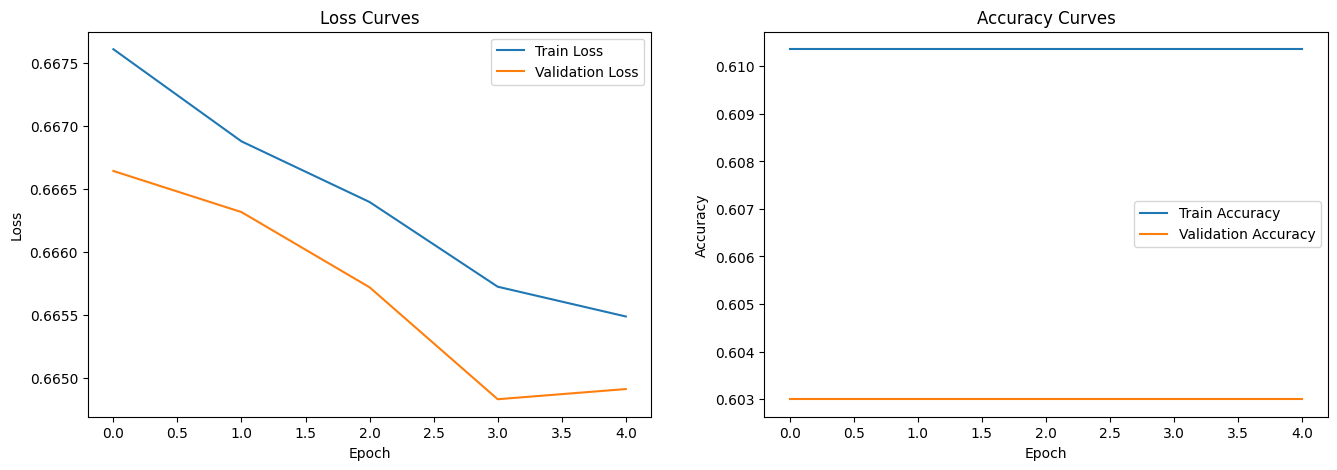

Train Loss: 0.6655
Validation Loss: 0.6649
Train Accuracy: 0.6104
Validation Accuracy: 0.6030


In [ ]:
class TitanicNN(nn.Module):
    def __init__(self):
        super(TitanicNN, self).__init__()
        ### ------------------------------------------------
        ### TODO 2/4: Define model architecture here
        ### ------------------------------------------------
        # Linear / Fully-Connected Layer:
        self.fc1 = nn.Linear(INPUT_SIZE, 32)  # input
        self.fc2 = nn.Linear(32, 16)  # hidden
        self.fc3 = nn.Linear(16, 1)  # output for binary classifier

        # Regularization Techniques:
        self.dropout = nn.Dropout(p=0.5)

        # Activation Functions:
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()  # for binary classifier

        #...
        ### ------------------------------------------------END TODO 2/4

    def forward(self, x):
        ### ------------------------------------------------
        ### TODO 3/4: Define forward pass here
        ### ------------------------------------------------

        x = self.fc1(x)
        x = self.relu(x)
        # x = self.dropout(x)

        x = self.fc2(x)
        x = self.relu(x)
        # x = self.dropout(x)

        x = self.fc3(x)
        x = self.sigmoid(x)

        return x
        ### ------------------------------------------------END TODO 3/4

# Alternative method of defining your model:
# model = nn.Sequential(
#     nn.Linear(in_features=X.shape[1], out_features=1),
#     ...,
#     )

model = TitanicNN()

### ---------------------------------------------------------------------------
### TODO 4/4: modify hyperparameters (choice of optimizer, learning rate, etc.)
### ---------------------------------------------------------------------------

# Epochs: the number of complete passes of the training dataset
epochs = 5

# Batch Size: the number of training samples
# in one forward/backward pass. Smaller batch size
# may result in more noise when calculating errors,
# while larger batch sizes obtain a more accurate
# estimate of the true gradient at the cost of
# computation time
batch_size = 16

# Learning Rate: determines step size at each
# iteration of optimizer
lr = 1e-5

loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=0, amsgrad=False)

### ---------------------------------------------------------------------------END TODO 4/4

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=y_test.shape[0], shuffle=True)

def train_validate(train_loader: DataLoader, val_loader: DataLoader, model: nn.Module, loss_function: nn.Module, optimizer: torch.optim.Optimizer):
    """
    Runs a single epoch of training and validation for a given model.

    This function trains the model for one epoch using the provided training data,
    computes the loss, performs backpropagation, and updates the model's parameters.
    It also evaluates the model on the validation set and returns the average training
    and validation losses and accuracies for the epoch.

    Args:
        train_loader: DataLoader for the training dataset.
            Contains batches of input data and corresponding labels.
        val_loader: DataLoader for the validation dataset.
            Contains batches of input data and corresponding labels.
        model: The neural network model to be trained and validated.
        loss_function: Loss function to be used for computing the loss.
            For example, `torch.nn.CrossEntropyLoss` or `torch.nn.BCELoss`.
        optimizer: Optimizer for updating the model's parameters
            based on the computed gradients. For example, `torch.optim.Adam` or `torch.optim.SGD`.

    Returns:
        tuple: A tuple containing:
            - train_loss (float): The average loss over the training dataset for this epoch.
            - val_loss (float): The average loss over the validation dataset for this epoch.
            - train_accuracy (float): The accuracy over the training dataset for this epoch.
            - val_accuracy (float): The accuracy over the validation dataset for this epoch.

    """
    size = len(train_loader.dataset)
    model.train()
    running_loss, train_accuracy = 0, 0
    for batch, (X, y) in enumerate(train_loader):

        # Compute prediction error
        pred = model(X)
        loss = loss_function(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        running_loss += loss.item()
        # Convert probabilities to binary predictions
        pred_binary = (pred > 0.5).float()
        correct_predictions = (pred_binary.squeeze(1) == y.squeeze(1)).float().sum().item()
        train_accuracy += correct_predictions

    train_loss = running_loss / len(train_loader)
    train_accuracy /= size

    size = len(val_loader.dataset)
    num_batches = len(val_loader)
    model.eval()
    val_loss, val_accuracy = 0, 0
    with torch.no_grad():
        for X, y in val_loader:
            pred = model(X)
            val_loss += loss_function(pred, y).item()

            # Convert probabilities to binary predictions
            pred_binary = (pred > 0.5).float()
            correct_predictions = (pred_binary.squeeze(1) == y.squeeze(1)).float().sum().item()
            val_accuracy += correct_predictions

    val_loss /= num_batches
    val_accuracy /= size
    return train_loss, val_loss, train_accuracy, val_accuracy

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
for t in range(epochs):
    train_loss, val_loss, train_accuracy, val_accuracy = train_validate(train_loader, val_loader, model, loss_function, optimizer)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

def plot_train_curves(train_losses: list[float], val_losses: list[float], train_accuracies: list[float], val_accuracies: list[float]) -> None:
    plt.figure(figsize=(16, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label="Train Accuracy")
    plt.plot(val_accuracies, label="Validation Accuracy")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()
    plt.show()

    print(f'Train Loss: {train_losses[-1]:.4f}')
    print(f'Validation Loss: {val_losses[-1]:.4f}')
    print(f'Train Accuracy: {train_accuracies[-1]:.4f}')
    print(f'Validation Accuracy: {val_accuracies[-1]:.4f}')

plot_train_curves(train_losses, val_losses, train_accuracies, val_accuracies)


# Model Testing

After training and optimizing your model, run the below cell to test it on your test dataset. The test function have already been written for you

In [ ]:
def test(test_loader, model, loss_function):
    size = len(test_loader.dataset)
    num_batches = len(test_loader)
    model.eval()
    test_loss, correct_predictions = 0, 0

    with torch.no_grad():
        for X, y in test_loader:
            pred = model(X)
            test_loss += loss_function(pred, y).item()

            # Convert probabilities to binary predictions
            pred_binary = (pred > 0.5).float()
            correct_predictions += (pred_binary.squeeze(1) == y.squeeze(1)).float().sum().item()

    # Average loss and accuracy
    test_loss /= num_batches
    test_accuracy = correct_predictions / size * 100  # Convert to percentage

    print(f"Test Set Metrics:\n Accuracy: {test_accuracy:>0.1f}%\n Loss: {test_loss:>8f} \n")

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=y_test.shape[0], shuffle=True)
test(test_loader, model, loss_function)

Test Set Metrics:
 Accuracy: 62.4%
 Loss: 0.663181 



In [10]:
# from UM GPT

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import numpy as np
from itertools import product

class TitanicTestNN(nn.Module):
    def __init__(self, input_size, hidden_units):
        super(TitanicTestNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_units[0])
        self.fc2 = nn.Linear(hidden_units[0], hidden_units[1])
        self.fc3 = nn.Linear(hidden_units[1], 1)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

def preprocess_data(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return torch.tensor(X_scaled, dtype=torch.float32)

def train_validate(train_loader, val_loader, model, loss_function, optimizer):
    size = len(train_loader.dataset)
    model.train()
    running_loss, train_accuracy = 0, 0
    for X, y in train_loader:
        pred = model(X)
        loss = loss_function(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        running_loss += loss.item()
        pred_binary = (pred > 0.5).float()
        correct_predictions = (pred_binary.squeeze(1) == y.squeeze(1)).float().sum().item()
        train_accuracy += correct_predictions

    train_loss = running_loss / len(train_loader)
    train_accuracy /= size

    size = len(val_loader.dataset)
    num_batches = len(val_loader)
    model.eval()
    val_loss, val_accuracy = 0, 0
    with torch.no_grad():
        for X, y in val_loader:
            pred = model(X)
            val_loss += loss_function(pred, y).item()
            pred_binary = (pred > 0.5).float()
            correct_predictions = (pred_binary.squeeze(1) == y.squeeze(1)).float().sum().item()
            val_accuracy += correct_predictions

    val_loss /= num_batches
    val_accuracy /= size
    return train_loss, val_loss, train_accuracy, val_accuracy

# Example Data Preparation
input_size = 15
train_data, val_data, test_data = None, None, None  # Placeholder for actual data

X_train, y_train = np.random.randn(444, input_size), np.random.randint(0, 2, 444)
X_val, y_val = np.random.randn(267, input_size), np.random.randint(0, 2, 267)
X_test, y_test = np.random.randn(178, input_size), np.random.randint(0, 2, 178)

X_train = preprocess_data(X_train)
X_val = preprocess_data(X_val)
X_test = preprocess_data(X_test)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

# Hyperparameter grid
hidden_units_list = [(32, 32), (64, 32), (32, 16)]
batch_sizes = [16, 32]
learning_rates = [1e-5, 1e-4, 1e-3]

# Placeholder for best hyperparameters and their performance
best_hyperparams = None
best_val_loss = float('inf')

for hidden_units, batch_size, lr in product(hidden_units_list, batch_sizes, learning_rates):
    print(f"Training with hidden_units={hidden_units}, batch_size={batch_size}, lr={lr}")

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

    model = TitanicTestNN(input_size=input_size, hidden_units=hidden_units)
    loss_function = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)

    epochs = 10
    for t in range(epochs):
        train_loss, val_loss, train_accuracy, val_accuracy = train_validate(train_loader, val_loader, model, loss_function, optimizer)

    print(f"Finished training with val_loss={val_loss:.4f}, val_accuracy={val_accuracy:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_hyperparams = (hidden_units, batch_size, lr)

print(f"Best hyperparameters: hidden_units={best_hyperparams[0]}, batch_size={best_hyperparams[1]}, lr={best_hyperparams[2]} with validation loss {best_val_loss:.4f}")

# You can now train your final model with the best hyperparameters found from the grid search
best_hidden_units, best_batch_size, best_lr = best_hyperparams

train_loader = DataLoader(train_dataset, batch_size=best_batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=best_batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=best_batch_size, shuffle=False)

model = TitanicTestNN(input_size=input_size, hidden_units=best_hidden_units)
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=best_lr, weight_decay=1e-5)

# Example final training loop with early stopping
best_val_loss = float('inf')
patience = 10
counter = 0

for t in range(epochs):
    train_loss, val_loss, train_accuracy, val_accuracy = train_validate(train_loader, val_loader, model, loss_function, optimizer)

    print(f"Epoch {t+1}/{epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f} - Train Acc: {train_accuracy:.4f} - Val Acc: {val_accuracy:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), 'best_model.pth')  # Save the best model
    else:
        counter += 1

    if counter >= patience:
        print("Early stopping triggered")
        break

model.load_state_dict(torch.load('best_model.pth'))

# Evaluate on test set
model.eval()
test_loss, test_accuracy = 0, 0
with torch.no_grad():
    for X, y in DataLoader(test_dataset, batch_size=best_batch_size, shuffle=False):
        pred = model(X)
        test_loss += loss_function(pred, y).item()
        pred_binary = (pred > 0.5).float()
        correct_predictions = (pred_binary.squeeze(1) == y.squeeze(1)).float().sum().item()
        test_accuracy += correct_predictions

test_loss /= len(test_loader)
test_accuracy /= len(test_loader.dataset)
print(f"Test Loss: {test_loss:.4f} - Test Accuracy: {test_accuracy:.4f}")

Training with hidden_units=(32, 32), batch_size=16, lr=1e-05
Finished training with val_loss=0.6927, val_accuracy=0.5393
Training with hidden_units=(32, 32), batch_size=16, lr=0.0001
Finished training with val_loss=0.6967, val_accuracy=0.4757
Training with hidden_units=(32, 32), batch_size=16, lr=0.001
Finished training with val_loss=0.7099, val_accuracy=0.4831
Training with hidden_units=(32, 32), batch_size=32, lr=1e-05
Finished training with val_loss=0.6914, val_accuracy=0.5056
Training with hidden_units=(32, 32), batch_size=32, lr=0.0001
Finished training with val_loss=0.6972, val_accuracy=0.5094
Training with hidden_units=(32, 32), batch_size=32, lr=0.001
Finished training with val_loss=0.7042, val_accuracy=0.4831
Training with hidden_units=(64, 32), batch_size=16, lr=1e-05
Finished training with val_loss=0.7010, val_accuracy=0.5094
Training with hidden_units=(64, 32), batch_size=16, lr=0.0001
Finished training with val_loss=0.6922, val_accuracy=0.5169
Training with hidden_units=(6

<ipython-input-10-af2e0eee21a8>:153: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import numpy as np
from itertools import product

# Define the neural network class
class TitanicTest2NN(nn.Module):
    def __init__(self, input_size, hidden_units):
        super(TitanicTest2NN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_units[0])
        self.fc2 = nn.Linear(hidden_units[0], hidden_units[1])
        self.fc3 = nn.Linear(hidden_units[1], 1)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Preprocess data function
def preprocess_data(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return torch.tensor(X_scaled, dtype=torch.float32)

# Training and validation function
def train_validate(train_loader, val_loader, model, loss_function, optimizer, epochs):
    for _ in range(epochs):
        model.train()
        running_loss, train_accuracy = 0, 0
        for X, y in train_loader:
            pred = model(X)
            loss = loss_function(pred, y)

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            running_loss += loss.item()
            pred_binary = (pred > 0.5).float()
            correct_predictions = (pred_binary.squeeze(1) == y.squeeze(1)).float().sum().item()
            train_accuracy += correct_predictions

        train_loss = running_loss / len(train_loader)
        train_accuracy /= len(train_loader.dataset)

        model.eval()
        val_loss, val_accuracy = 0, 0
        with torch.no_grad():
            for X, y in val_loader:
                pred = model(X)
                val_loss += loss_function(pred, y).item()
                pred_binary = (pred > 0.5).float()
                correct_predictions = (pred_binary.squeeze(1) == y.squeeze(1)).float().sum().item()
                val_accuracy += correct_predictions

        val_loss /= len(val_loader)
        val_accuracy /= len(val_loader.dataset)

    return train_loss, val_loss, train_accuracy, val_accuracy

# Example Data Preparation
input_size = 8  # Replace this with the actual input size after preprocessing
train_data, val_data, test_data = None, None, None  # Placeholder for actual data

X_train, y_train = np.random.randn(444, input_size), np.random.randint(0, 2, 444)
X_val, y_val = np.random.randn(267, input_size), np.random.randint(0, 2, 267)
X_test, y_test = np.random.randn(178, input_size), np.random.randint(0, 2, 178)

X_train = preprocess_data(X_train)
X_val = preprocess_data(X_val)
X_test = preprocess_data(X_test)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

# Hyperparameter grid
hidden_units_list = [(128, 64), (64, 64), (64, 32), (32, 32), (32, 16)]
batch_sizes = [4, 8, 16, 32, 64]
learning_rates = [5e-6, 1e-5, 5e-4, 1e-4, 5e-4, 1e-3]
epoch_list = [2, 5, 10, 20]

# Placeholder for best hyperparameters and their performance
best_hyperparams = None
best_val_loss = float('inf')

# Grid Search
for hidden_units, batch_size, lr, epochs in product(hidden_units_list, batch_sizes, learning_rates, epoch_list):
    print(f"Training with hidden_units={hidden_units}, batch_size={batch_size}, lr={lr}, epochs={epochs}")

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

    model = TitanicTest2NN(input_size=input_size, hidden_units=hidden_units)
    loss_function = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)

    train_loss, val_loss, train_accuracy, val_accuracy = train_validate(train_loader, val_loader, model, loss_function, optimizer, epochs)

    print(f"Finished training with val_loss={val_loss:.4f}, val_accuracy={val_accuracy:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_hyperparams = (hidden_units, batch_size, lr, epochs)

print(f"Best hyperparameters: hidden_units={best_hyperparams[0]}, batch_size={best_hyperparams[1]}, lr={best_hyperparams[2]}, epochs={best_hyperparams[3]} with validation loss {best_val_loss:.4f}")

# Train Final Model with Best Hyperparameters
best_hidden_units, best_batch_size, best_lr, best_epochs = best_hyperparams

train_loader = DataLoader(train_dataset, batch_size=best_batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=best_batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=best_batch_size, shuffle=False)

model = TitanicTest2NN(input_size=input_size, hidden_units=best_hidden_units)
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=best_lr, weight_decay=1e-5)

# Example final training loop with early stopping
best_val_loss = float('inf')
patience = 10
counter = 0

for t in range(best_epochs):
    train_loss, val_loss, train_accuracy, val_accuracy = train_validate(train_loader, val_loader, model, loss_function, optimizer, 1)

    print(f"Epoch {t+1}/{best_epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f} - Train Acc: {train_accuracy:.4f} - Val Acc: {val_accuracy:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), 'best_model.pth')  # Save the best model
    else:
        counter += 1

    if counter >= patience:
        print("Early stopping triggered")
        break

model.load_state_dict(torch.load('best_model.pth'))

# Evaluate on test set
model.eval()
test_loss, test_accuracy = 0, 0
with torch.no_grad():
    for X, y in test_loader:
        pred = model(X)
        test_loss += loss_function(pred, y).item()
        pred_binary = (pred > 0.5).float()
        correct_predictions = (pred_binary.squeeze(1) == y.squeeze(1)).float().sum().item()
        test_accuracy += correct_predictions

test_loss /= len(test_loader)
test_accuracy /= len(test_loader.dataset)
print(f"Test Loss: {test_loss:.4f} - Test Accuracy: {test_accuracy:.4f}")

Training with hidden_units=(128, 64), batch_size=4, lr=5e-06, epochs=2
Finished training with val_loss=0.6969, val_accuracy=0.4719
Training with hidden_units=(128, 64), batch_size=4, lr=5e-06, epochs=5
Finished training with val_loss=0.7004, val_accuracy=0.4831
Training with hidden_units=(128, 64), batch_size=4, lr=5e-06, epochs=10
Finished training with val_loss=0.6923, val_accuracy=0.4981
Training with hidden_units=(128, 64), batch_size=4, lr=5e-06, epochs=20
Finished training with val_loss=0.6948, val_accuracy=0.5056
Training with hidden_units=(128, 64), batch_size=4, lr=1e-05, epochs=2
Finished training with val_loss=0.6972, val_accuracy=0.4719
Training with hidden_units=(128, 64), batch_size=4, lr=1e-05, epochs=5
Finished training with val_loss=0.6995, val_accuracy=0.4831
Training with hidden_units=(128, 64), batch_size=4, lr=1e-05, epochs=10
Finished training with val_loss=0.6928, val_accuracy=0.5169
Training with hidden_units=(128, 64), batch_size=4, lr=1e-05, epochs=20
Finished

<ipython-input-12-8433a87d9131>:153: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))
